# **AIM - Multi-Aspect Annotations of Tweets Related to the MeToo Movement**

The dataset consists of tweets belonging to #MeToo movement on Twitter, labelled into different categories. Due to Twitter's development policies, we only provide the tweet ID's and corresponding labels, other data can be fetched via Twitter API. The data has been labelled by experts, with the majority taken into the account for deciding the final label. We provide these labels for each of the tweets.

Relevance

Directed Hate

Generalized Hate

Sarcasm

Allegation

Justification

Refutation

Support

Oppose 

In [ ]:
! pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp37-none-any.whl size=4477 sha256=c4ca3b59a9c865ed5ee419ac3e550675e30ffb6722fa9cb39d678cd9f3f5bcf4
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [ ]:
#importing necessary libraries

from tweepy import *
import tweepy
 
import pandas as pd
import csv
import re 
import string
import preprocessor as p

# getting the access token from twitter developer account
consumer_key = "MYWiXQtn9qIvNh0HvKKGD8cow"
consumer_secret = "pACs7LGTcJBYDmIexvb10TNmeKGLskHjlaHATcFhyviWuubC0p"
access_key= "1365340085714001930-9spwyTpUR1TLDxSRypPNzuJPlfuxZu"
access_secret = "QDUg3KhCXtmdAIJjVijhAKoaOrlE8PPUWrdbEoqBYTDU5"


In [ ]:
#authentication from twitter developer account

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

In [ ]:
#connecting the API
api = tweepy.API(auth,wait_on_rate_limit=True)

# ***Extracting tweets using tweepy for the given tweet IDs in the dataset***

In [ ]:
# This method creates the training set
def createTrainingSet(corpusFile, targetResultFile):
    import csv
    import time

    counter = 0
    corpus = []

    with open(corpusFile, 'r') as csvfile:
        lineReader = csv.reader(csvfile, delimiter=',', quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id": row[0], "country": row[1], "relevance": row[2], "directed_hate": row[3], "generalised_hate": row[4],
                           "sarcasm": row[5], "allegation": row[6], "justification": row[7], "refutation": row[8], "support": row[9], "oppose": row[10]})

    sleeptime = 2
    i = 0
    trainingDataSet = []

    for tweet in corpus:
        try:
            tweetFetched = api.get_status(tweet["tweet_id"])
            print("Tweet fetched" + tweetFetched.text)
            tweet["text"] = tweetFetched.text
            trainingDataSet.append(tweet)
            time.sleep(sleeptime)

        except:
            print("Inside the exception - no:2")
            continue

        print(i)
        i += 1


    with open(targetResultFile, 'w') as csvfile:
        linewriter = csv.writer(csvfile, delimiter=',', quotechar="\"")
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["country"], tweet["relevance"], tweet["directed_hate"], 
                                     tweet["generalised_hate"], tweet["sarcasm"], tweet["allegation"], tweet["justification"], 
                                     tweet["refutation"], tweet["support"], tweet["oppose"]])
            except Exception as e:
                print(e)
            
    return trainingDataSet

# Code starts here
# This is twitter dataset
corpusFile = "/content/Data/MeTooMA.csv"
# This is my target file
targetResultFile = "/content/Data/ResultFile.csv"
# Call the method
resultFile = createTrainingSet(corpusFile, targetResultFile)

Streaming output truncated to the last 5000 lines.

@ndtvindia @ravishndtv #MeToo @Bollyhungama @bollywood_life… https://t.co/tDTLsznP66
6413
Tweet fetched#MeToo : ‘Stree’ actress #florasaini sends legal notice to former boyfriend and producer Gaurang Doshi… https://t.co/oGa0RKrNGo
6414
Tweet fetchedThe other side of #MeToo

Every celeb stating in their posts is proven offenders
Proving the crime is an imp aspect… https://t.co/c9afhohByG
6415
Inside the exception - no:2
Tweet fetchedExtortion &amp; Threatening for #FalseRapeCase #FakeCase

@rashtrapatibhvn @narendramodi @VPSecretariat @AmitShah… https://t.co/VNJi4K5TM4
6416
Tweet fetchedGuy's if u r facing any false #MeToo movement  anywhere.The only helpline to save u is 8882498498. https://t.co/z5ZQfV9nfl
6417
Tweet fetched@ImplicatedH @VikramArora20 @rashtrapatibhvn @narendramodi @PMOIndia @HMOIndia @OfficeOfRSP @rsprasad… https://t.co/XFPaLQNo53
6418
Tweet fetchedInfuriated by the questions thrown by Sri Lankan journos on the alleg

In [ ]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# loading our dataset into pandas variable df
df = pd.read_csv('/content/Data/ResultFile (2).csv')
myCopy = df.copy()

df.shape

(8245, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          8245 non-null   float64
 1   text              8245 non-null   object 
 2   country           8245 non-null   object 
 3   relevance         8245 non-null   int64  
 4   directed_hate     8245 non-null   int64  
 5   generalised_hate  8245 non-null   int64  
 6   sarcasm           8245 non-null   int64  
 7   allegation        8245 non-null   int64  
 8   justification     8245 non-null   int64  
 9   refutation        8245 non-null   int64  
 10  Support           8245 non-null   int64  
 11  oppose            8245 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 773.1+ KB


In [ ]:
df.describe()

,tweet_id,relevance,directed_hate,generalised_hate,sarcasm,allegation,justification,refutation,Support,oppose
count,8.245000e+03,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.000000,8245.00000,8245.000000
mean,1.052783e+18,0.727714,0.041237,0.028745,0.022680,0.058338,0.029836,0.022317,0.31134,0.073378
std,2.473672e+15,0.445163,0.198850,0.167098,0.148892,0.234396,0.170146,0.147720,0.46307,0.260771
min,1.048510e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.051090e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.052070e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.054630e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,1.074650e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
#checking for null values in the dataset
df.isnull().sum()

tweet_id            0
text                0
country             0
relevance           0
directed_hate       0
generalised_hate    0
sarcasm             0
allegation          0
justification       0
refutation          0
Support             0
oppose              0
dtype: int64

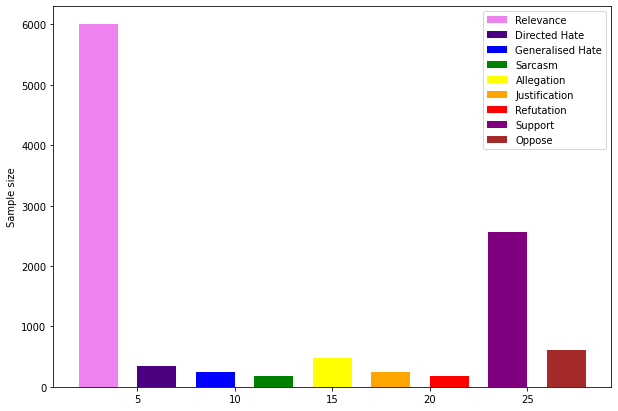

In [ ]:
# Target class distribution

relevance = df[df['relevance'] == 1].shape[0]
directed_hate = df[df['directed_hate'] == 1].shape[0]
generalised_hate = df[df['generalised_hate'] == 1].shape[0]
sarcasm = df[df['sarcasm'] == 1].shape[0]
allegation = df[df['allegation'] == 1].shape[0]
justification = df[df['justification'] == 1].shape[0]
refutation = df[df['refutation'] == 1].shape[0]
Support = df[df['Support'] == 1].shape[0]
oppose = df[df['oppose'] == 1].shape[0]
# Bar plot for 9 classes
plt.rcParams['figure.figsize'] = (10, 7)
plt.bar(3,relevance,2, label="Relevance", color='violet')
plt.bar(6,directed_hate,2, label="Directed Hate", color='indigo')
plt.bar(9,generalised_hate,2, label="Generalised Hate", color='blue')
plt.bar(12,sarcasm,2, label="Sarcasm", color='green')
plt.bar(15,allegation,2, label="Allegation", color='yellow')
plt.bar(18,justification,2, label="Justification", color='orange')
plt.bar(21,refutation,2, label="Refutation", color='red')
plt.bar(24,Support,2, label="Support", color='purple')
plt.bar(27,oppose,2, label="Oppose", color='brown')
plt.legend()
plt.ylabel('Sample size')
plt.show()

In [ ]:
import plotly.express as px
from plotly import graph_objs as go
import seaborn as sb
import matplotlib.pyplot as mplot

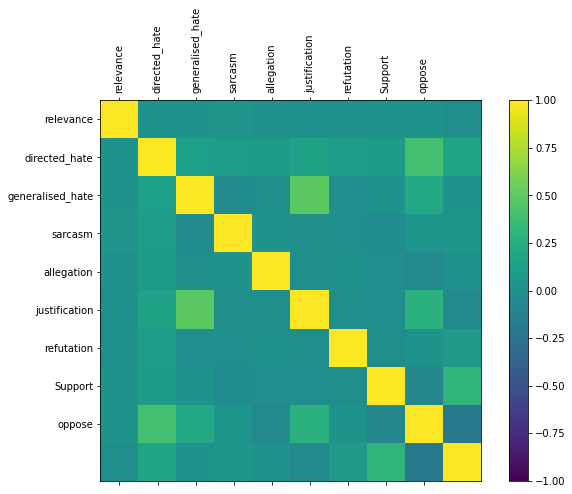

In [ ]:
# plot correlation matrix

correlations = df.corr()
fig = mplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
list = []
for col in df.columns:
  if col == "tweet_id" or col == "country" or col == "text":
    continue
  else:
    list.append(col)
ax.set_xticklabels(list)
ax.set_yticklabels(list)
mplot.xticks(rotation=90)
mplot.show()

In [ ]:
count1 = len(df[df['country'] == 'India'])
count2 = len(df[df['country'] == 'USA'])
count3 = len(df[df['country'] == 'UK'])
count4 = len(df[df['country'] == 'France'])
count5 = len(df) - count1 - count2 - count3 - count4

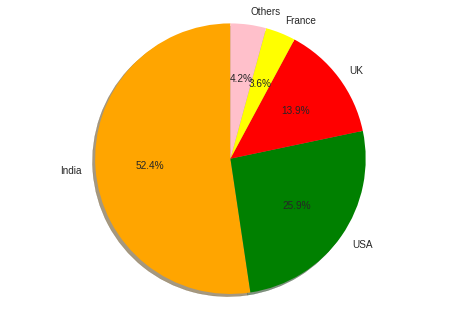

In [ ]:
#country-wise distribution of the tweets

labels = ['India', 'USA', 'UK', 'France', 'Others']
sizes = [count1, count2, count3, count4, count5]
colorArr = ['Orange', 'Green', 'Red', 'Yellow', 'Pink']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colorArr)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Data cleaning**

*   Removing links and usernames
*   Removing punctuations, numbers and special characters
*   Tokenization of tweets
*   Removing stopwords



In [ ]:
# dropping tweet_id column since we are now concerned with the tweets' text
df.drop(['tweet_id'], axis = 1, inplace= True)

In [ ]:
from nltk.stem.porter import *
plt.style.use('seaborn')
import plotly.express as px
from plotly import graph_objs as go
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
for index, row in df.iterrows():
    tweet = row.text
    tweet = re.sub(r"https\S+", "", tweet) #remove links
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) #replace #word with word
    
    df['text'].iloc[index:index+1] = tweet

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#displaying tweets after above cleaning
df['text'].head()

0    Domestic Violence Awareness Hasn’t Caught Up W...
1                               Mother Nature’s MeToo 
2    It is 'high time' MeToo named and shamed men i...
3    “There's this idea that persistence involves s...
4                Meredith’s MeToo moment on TheOffice 
Name: text, dtype: object

In [ ]:
# Helper function to remove unwanted patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Remove Twitter handles from the data 
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")


# Remove all words below 2 characters
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Remove punctuations, numbers, and special characters
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

# Tokenize the tweets
tokenized_tweet = df['text'].apply(lambda x: x.split())

df['text_tokenised'] = tokenized_tweet

In [ ]:
df['text_tokenised']

0       [Domestic, Violence, Awareness, Hasn, t, Caugh...
1                              [Mother, Nature, s, MeToo]
2       [high, time, MeToo, named, and, shamed, men, m...
3       [There, s, this, idea, that, persistence, invo...
4                 [Meredith, s, MeToo, moment, TheOffice]
                              ...                        
8240      [Metoo, campaign, and, what, labour, laws, say]
8241      [Metoo, campaign, and, what, labour, laws, say]
8242    [Insightful, peace, Hala, Al, Karib, the, dang...
8243    [Olivia, Munn, Opens, About, Predator, Scandal...
8244    [Megan, Fox, feels, excluded, from, the, MeToo...
Name: text_tokenised, Length: 8245, dtype: object

### Lemmatizing the tweets and removing stopwords

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
import string
stops = set(stopwords.words('english'))

stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [ ]:
#storing the lemmatized tweet in document variable 
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
documents = [clean_review(document) for document in df['text_tokenised']]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#splitting the data into training and testing data

training_documents = documents[0:6200]
testing_documents = documents[6200:]

**Choosing top 3000 words as features**

In [ ]:
all_words = []
for doc in training_documents:
    all_words += doc

In [ ]:
import nltk
freq = nltk.FreqDist(all_words)
common = freq.most_common(3000)
features = [i[0] for i in common]

In [ ]:
features

['metoo',
 'movement',
 'woman',
 'sexual',
 'harassment',
 'amp',
 'say',
 'india',
 'year',
 'metooindia',
 'allegation',
 'one',
 'men',
 'bollywood',
 'support',
 'story',
 'take',
 'women',
 'come',
 'accuse',
 'make',
 'like',
 'time',
 'talk',
 'news',
 'today',
 'trump',
 'read',
 'get',
 'call',
 'campaign',
 'need',
 'work',
 'video',
 'indian',
 'go',
 'people',
 'case',
 'share',
 'moment',
 'actress',
 'want',
 'assault',
 'new',
 'right',
 'film',
 'show',
 'link',
 'change',
 'victim',
 'day',
 'join',
 'look',
 'timesup',
 'abuse',
 'know',
 'post',
 'life',
 'man',
 'director',
 'actor',
 'kavanaugh',
 'see',
 'name',
 'ask',
 'via',
 'back',
 'still',
 'book',
 'sruthi',
 'era',
 'start',
 'let',
 'rally',
 'speak',
 'minister',
 'would',
 'stand',
 'khan',
 'believe',
 'must',
 'misconduct',
 'student',
 'allegations',
 'arjunsarja',
 'tweet',
 'rape',
 'charge',
 'malik',
 'workplace',
 'rap',
 'first',
 'world',
 'issue',
 'says',
 'anu',
 'good',
 'report',
 'ques

In [ ]:
def get_feature_dict(words):
    current_features = {}
    words_set = set(words)
    for w in features:
        current_features[w] = w in words_set
    return current_features

In [ ]:
training_data = [get_feature_dict(doc) for doc in training_documents]
testing_data = [get_feature_dict(doc) for doc in testing_documents]

In [ ]:
testing_data[0]

{'metoo': True,
 'movement': False,
 'woman': False,
 'sexual': False,
 'harassment': False,
 'amp': False,
 'say': False,
 'india': False,
 'year': False,
 'metooindia': False,
 'allegation': False,
 'one': False,
 'men': False,
 'bollywood': False,
 'support': False,
 'story': True,
 'take': False,
 'women': False,
 'come': False,
 'accuse': False,
 'make': False,
 'like': False,
 'time': False,
 'talk': False,
 'news': False,
 'today': False,
 'trump': False,
 'read': False,
 'get': False,
 'call': False,
 'campaign': False,
 'need': False,
 'work': False,
 'video': False,
 'indian': False,
 'go': False,
 'people': False,
 'case': False,
 'share': False,
 'moment': False,
 'actress': False,
 'want': False,
 'assault': False,
 'new': False,
 'right': False,
 'film': False,
 'show': False,
 'link': False,
 'change': False,
 'victim': False,
 'day': False,
 'join': False,
 'look': False,
 'timesup': False,
 'abuse': False,
 'know': False,
 'post': False,
 'life': False,
 'man': False,


In [ ]:
#converting data into list of tuples for each class

#relevance
train_relevance = []
target_rel = df['relevance']
for i in range(len(training_data)):
    train_relevance.append((training_data[i] , target_rel[i]))

test_relevance = []
for i in range(len(testing_data)):
    test_relevance.append((testing_data[i] , target_rel[6200+i]))

#directed hate
train_dh = []
target_dh = df['directed_hate']
for i in range(len(training_data)):
    train_dh.append((training_data[i] , target_dh[i]))

test_dh = []
for i in range(len(testing_data)):
    test_dh.append((testing_data[i] , target_dh[6200+i]))

#generalised hate
train_gh = []
target_gh = df['generalised_hate']
for i in range(len(training_data)):
    train_gh.append((training_data[i] , target_gh[i]))

test_gh = []
for i in range(len(testing_data)):
    test_gh.append((testing_data[i] , target_gh[6200+i]))


#sarcasm
train_sarcasm = []
target_sarcasm = df['sarcasm']
for i in range(len(training_data)):
    train_sarcasm.append((training_data[i] , target_sarcasm[i]))

test_sarcasm = []
for i in range(len(testing_data)):
    test_sarcasm.append((testing_data[i] , target_sarcasm[6200+i]))

#allegation
train_allegation = []
target_allegation = df['allegation']
for i in range(len(training_data)):
    train_allegation.append((training_data[i] , target_allegation[i]))

test_allegation = []
for i in range(len(testing_data)):
    test_allegation.append((testing_data[i] , target_allegation[6200+i]))

#justification
train_justification = []
target_justification = df['justification']
for i in range(len(training_data)):
    train_justification.append((training_data[i] , target_justification[i]))

test_justification = []
for i in range(len(testing_data)):
    test_justification.append((testing_data[i] , target_justification[6200+i]))

#refutation
train_refutation = []
target_refutation = df['refutation']
for i in range(len(training_data)):
    train_refutation.append((training_data[i] , target_refutation[i]))

test_refutation = []
for i in range(len(testing_data)):
    test_refutation.append((testing_data[i] , target_refutation[6200+i]))

#support
train_Favour = []
target_Favour = df['Support']
for i in range(len(training_data)):
    train_Favour.append((training_data[i] , target_Favour[i]))

test_Favour = []
for i in range(len(testing_data)):
    test_Favour.append((testing_data[i] , target_Favour[6200+i]))

#oppose
train_oppose = []
target_oppose = df['oppose']
for i in range(len(training_data)):
    train_oppose.append((training_data[i] , target_oppose[i]))

test_oppose = []
for i in range(len(testing_data)):
    test_oppose.append((testing_data[i] , target_oppose[6200+i]))


In [ ]:
#model 1 - SVM

from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier

In [ ]:
svc = SVC()
classifier_sklearn = SklearnClassifier(svc)

In [ ]:
svm_accuracy = []
classifier_sklearn.train(train_relevance)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_relevance))

classifier_sklearn.train(train_dh)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_dh))

classifier_sklearn.train(train_gh)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_gh))

classifier_sklearn.train(train_sarcasm)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_sarcasm))

classifier_sklearn.train(train_allegation)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_allegation))

classifier_sklearn.train(train_justification)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_justification))

classifier_sklearn.train(train_refutation)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_refutation))

classifier_sklearn.train(train_Favour)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_Favour))

classifier_sklearn.train(train_oppose)
svm_accuracy.append(nltk.classify.accuracy(classifier_sklearn, test_oppose))
svm_accuracy

[0.7354523227383863,
 0.9486552567237164,
 0.9682151589242054,
 0.9750611246943766,
 0.9339853300733496,
 0.984841075794621,
 0.9765281173594133,
 0.7154034229828851,
 0.9178484107579462]

In [ ]:
#model 2 - Random Forest

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
classifier_sklearn1 = SklearnClassifier(rfc)

In [ ]:
random_accuracy = []
classifier_sklearn1.train(train_relevance)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_relevance))

classifier_sklearn1.train(train_dh)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_dh))

classifier_sklearn1.train(train_gh)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_gh))

classifier_sklearn1.train(train_sarcasm)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_sarcasm))

classifier_sklearn1.train(train_allegation)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_allegation))

classifier_sklearn1.train(train_justification)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_justification))

classifier_sklearn1.train(train_refutation)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_refutation))

classifier_sklearn1.train(train_Favour)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_Favour))

classifier_sklearn1.train(train_oppose)
random_accuracy.append(nltk.classify.accuracy(classifier_sklearn1, test_oppose))
random_accuracy

[0.6728606356968215,
 0.9447432762836185,
 0.965281173594132,
 0.9721271393643032,
 0.9290953545232273,
 0.9828850855745721,
 0.9726161369193154,
 0.643520782396088,
 0.9119804400977995]

In [ ]:
#model 3 - Naive Bayes

from nltk import NaiveBayesClassifier

In [ ]:
naive_accuracy = []
classfier = NaiveBayesClassifier.train(train_relevance)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_relevance))

classfier = NaiveBayesClassifier.train(train_dh)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_dh))

classfier = NaiveBayesClassifier.train(train_gh)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_gh))

classfier = NaiveBayesClassifier.train(train_sarcasm)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_sarcasm))

classfier = NaiveBayesClassifier.train(train_allegation)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_allegation))

classfier = NaiveBayesClassifier.train(train_justification)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_justification))

classfier = NaiveBayesClassifier.train(train_refutation)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_refutation))

classfier = NaiveBayesClassifier.train(train_Favour)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_Favour))

classfier = NaiveBayesClassifier.train(train_oppose)
naive_accuracy.append(nltk.classify.accuracy(classfier, test_oppose))
naive_accuracy

[0.6841075794621027,
 0.9442542787286063,
 0.9677261613691932,
 0.9740831295843521,
 0.928117359413203,
 0.9819070904645477,
 0.9740831295843521,
 0.6400977995110024,
 0.9080684596577017]